In [2]:
import numpy as np

In [7]:
X = np.array(sorted(20 * x for x in np.random.rand(120, 1)))
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [8]:
X[-10:]

array([[16.60555635],
       [16.80762399],
       [17.34964716],
       [17.40667293],
       [17.63497509],
       [17.6835112 ],
       [18.36602932],
       [18.55323781],
       [18.71268908],
       [19.48043729]])

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [13]:
X_train.shape, Y_test.shape

((72, 1), (48, 1))

In [14]:
index_argsort = np.argsort(X_train.reshape(72,))

In [15]:
index_argsort

array([10, 47,  1, 17, 50, 43, 57, 42, 46, 14, 15, 60, 12, 20, 22, 35, 31,
       18, 41, 62, 70, 33,  6, 66,  0, 67, 68, 58, 25, 55, 16, 11, 49, 32,
       64, 61, 71, 36,  9, 40,  2, 38, 26, 39, 56, 30,  3, 45, 19, 28, 69,
        5, 34,  7, 29, 21, 63, 48, 37, 59, 13, 44,  4, 27, 51, 23, 52, 53,
       24, 65, 54,  8])

In [19]:
from sklearn.linear_model import LinearRegression
# Строим просто обычную модель
model_just_linear = LinearRegression(fit_intercept=False) # Не добавляем свободный коэффициент
model_just_linear.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

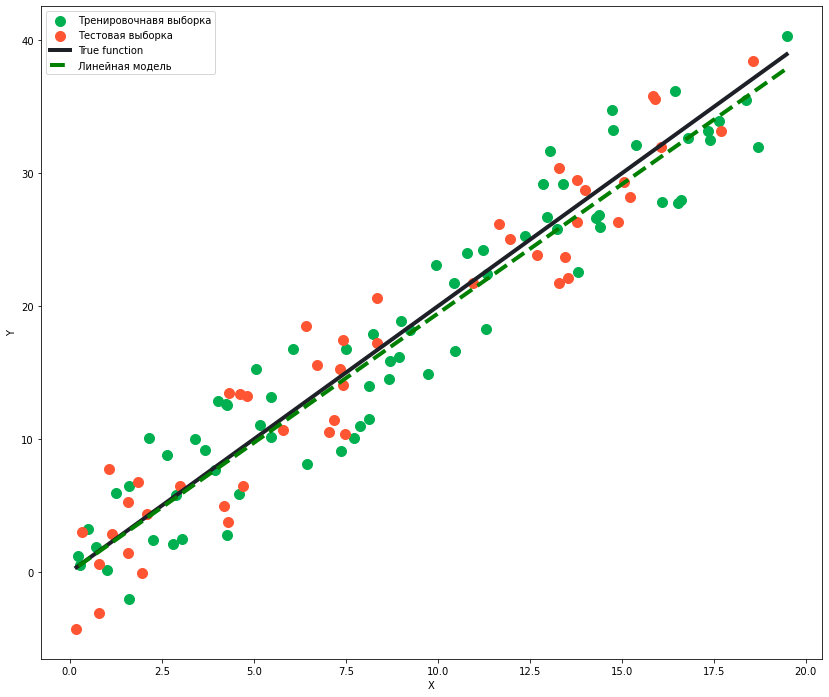

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(14, 12)

plt.scatter(X_train, Y_train, c = '#00B050', s = 100)
plt.scatter(X_test, Y_test, c = '#FF5533', s = 100)
plt.plot(X, [2 * x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], model_just_linear.predict(X_train[index_argsort]), '--g', linewidth = 4)

plt.legend(['Тренировочнавя выборка', 'Тестовая выборка', 'True function', 'Линейная модель'], loc = 'upper left')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [23]:
model_just_linear.coef_ # Почти 2 как и ожидалось при создании 

array([[1.94492247]])

In [26]:
# Типа степенная функция - каждый признак возводили в степень - полиномиальнавя модель
X_pol = X_train.copy()
for k in range(2, 26):
    X_pol = np.append(X_pol, np.array([x ** k for x in X_pol[:, 0]]).reshape(72, -1), axis=1) 

In [48]:
#from sklearn.pipeline import make_pipeline


#model_pol = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model_pol = LinearRegression(normalize=True)

model_pol.fit(X_pol, Y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

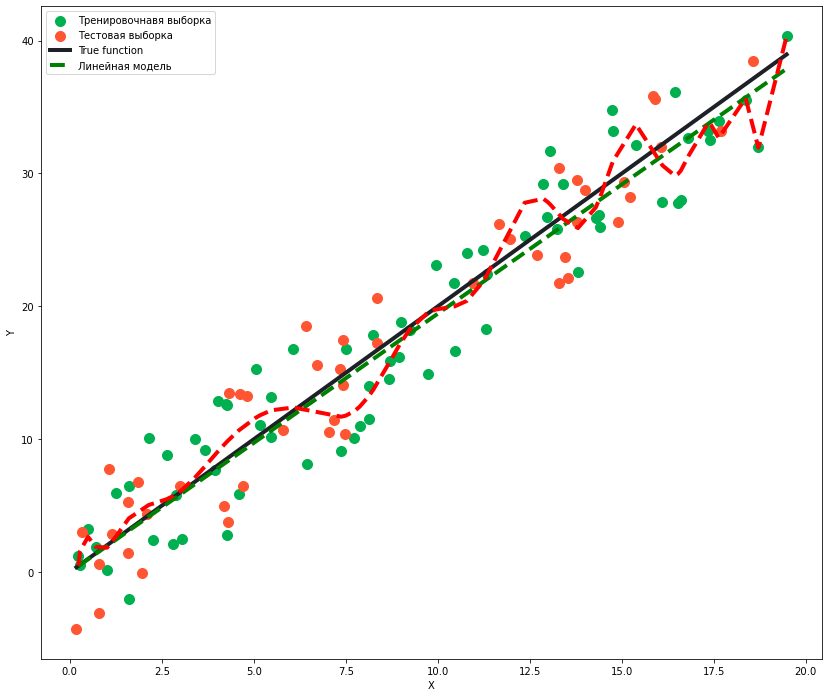

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(14, 12)

plt.scatter(X_train, Y_train, c = '#00B050', s = 100)
plt.scatter(X_test, Y_test, c = '#FF5533', s = 100)
plt.plot(X, [2 * x for x in X], '#1E2027', linewidth=4)

plt.plot(X_train[index_argsort], model_just_linear.predict(X_train[index_argsort]), '--g', linewidth = 4)
plt.plot(X_train[index_argsort], model_pol.predict(X_pol[index_argsort]), '--r', linewidth = 4)

plt.legend(['Тренировочнавя выборка', 'Тестовая выборка', 'True function', 'Линейная модель'], loc = 'upper left')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

В итоге модель сильно переуобучилась и потому отличается от нашей идеальной модели - прямой линии

In [50]:
np.mean((model_just_linear.predict(X_train) - Y_train) ** 2) #Calculating MAE on train sample fpr linear model

10.766762009471506

In [51]:
np.mean((model_just_linear.predict(X_test) - Y_test)**2) # On test simple

9.814010525965493

In [52]:
np.mean((model_pol.predict(X_pol) - Y_train) ** 2) #Calculating MAE on train sample fpr polinomoal model

8.079477768755998

Модель кажется реально крутой и лучше, чем линейная, однако если ее проверить на данных, которых она не видела

In [56]:
# Типа степенная функция - каждый признак возводили в степень - полиномиальнавя модель
X_pol_test= X_test.copy()
for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, np.array([x ** k for x in X_pol_test[:, 0]]).reshape(48, -1), axis=1) 

In [58]:
np.mean((model_pol.predict(X_pol_test) - Y_test) ** 2) #Calculating MAE on test sample fpr polinomoal model

12.083885096267961